In [18]:
pip install pandas numpy matplotlib scikit-learn seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------- ----------------------- 112.6/293.3 kB 3.2 MB/s eta 0:00:01
     ------------------------------ ------- 235.5/293.3 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('ohlc.csv')
df.head

<bound method NDFrame.head of                unix                 date   symbol      open      high  \
0     1677283200000  2023-02-25 00:00:00  BTC/USD  23192.31  23215.96   
1     1677196800000  2023-02-24 00:00:00  BTC/USD  23948.04  24129.26   
2     1677110400000  2023-02-23 00:00:00  BTC/USD  24187.13  24600.00   
3     1677024000000  2023-02-22 00:00:00  BTC/USD  24450.50  24478.31   
4     1676937600000  2023-02-21 00:00:00  BTC/USD  24837.60  25250.00   
...             ...                  ...      ...       ...       ...   
3046     1444622400  2015-10-12 04:00:00  BTC/USD    248.98    248.98   
3047     1444536000  2015-10-11 04:00:00  BTC/USD    246.30    249.50   
3048     1444449600  2015-10-10 04:00:00  BTC/USD    245.51    246.30   
3049     1444363200  2015-10-09 04:00:00  BTC/USD    243.60    249.97   
3050     1444276800  2015-10-08 04:00:00  BTC/USD      0.00    245.00   

           low     close  Volume BTC    Volume USD  
0     22763.07  23170.88  133.808693  3.

In [4]:
df.drop(['Volume USD'], axis=1, inplace=True)

In [5]:
df.describe()

,unix,open,high,low,close,Volume BTC
count,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,1.181650e+12,16262.807142,16710.443203,15776.479666,16261.709410,2806.644653
std,7.085008e+11,16283.757706,16733.146585,15774.887082,16274.577374,3577.310068
min,1.444277e+09,0.000000,245.000000,0.000000,243.600000,0.000000
25%,1.510157e+09,3827.435000,3929.905000,3748.005000,3831.570000,893.937122
50%,1.576037e+12,9518.310000,9762.750000,9260.150000,9543.680000,1632.448129
75%,1.641917e+12,22839.325000,23323.520000,22355.255000,22839.325000,3148.306449
max,1.677283e+12,68525.750000,69000.000000,66262.480000,68525.750000,54142.433523


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        3051 non-null   int64  
 1   date        3051 non-null   object 
 2   symbol      3051 non-null   object 
 3   open        3051 non-null   float64
 4   high        3051 non-null   float64
 5   low         3051 non-null   float64
 6   close       3051 non-null   float64
 7   Volume BTC  3051 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 190.8+ KB


In [7]:
df.drop(['unix'], axis=1, inplace=True)

In [8]:
df.drop(['symbol'], axis=1, inplace=True)

In [9]:
df.rename(columns={'Volume BTC':'volume'}, inplace=True)

In [10]:
date = df['date'].str.replace(' ', '-').str.split('-', expand=True)
year = date[0].astype('int')
month = date[1].astype('int')
day = date[2].astype('int')
df['year'] = year
df['month'] = month
df['day'] = day
df

,date,open,high,low,close,volume,year,month,day
0,2023-02-25 00:00:00,23192.31,23215.96,22763.07,23170.88,133.808693,2023,2,25
1,2023-02-24 00:00:00,23948.04,24129.26,22853.70,23192.31,544.586573,2023,2,24
2,2023-02-23 00:00:00,24187.13,24600.00,23626.93,23948.04,350.609705,2023,2,23
3,2023-02-22 00:00:00,24450.50,24478.31,23585.31,24187.13,400.018953,2023,2,22
4,2023-02-21 00:00:00,24837.60,25250.00,24165.65,24450.50,612.681818,2023,2,21
...,...,...,...,...,...,...,...,...,...
3046,2015-10-12 04:00:00,248.98,248.98,245.75,245.75,71.047743,2015,10,12
3047,2015-10-11 04:00:00,246.30,249.50,245.96,248.98,22.747091,2015,10,11
3048,2015-10-10 04:00:00,245.51,246.30,244.60,246.30,30.870549,2015,10,10
3049,2015-10-09 04:00:00,243.60,249.97,243.60,245.51,61.587068,2015,10,9


In [11]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
year      0
month     0
day       0
dtype: int64

C:\Users\memed\AppData\Local\Temp\ipykernel_12004\3119655578.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = df.groupby('year').mean()
C:\Users\memed\AppData\Local\Temp\ipykernel_12004\3119655578.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


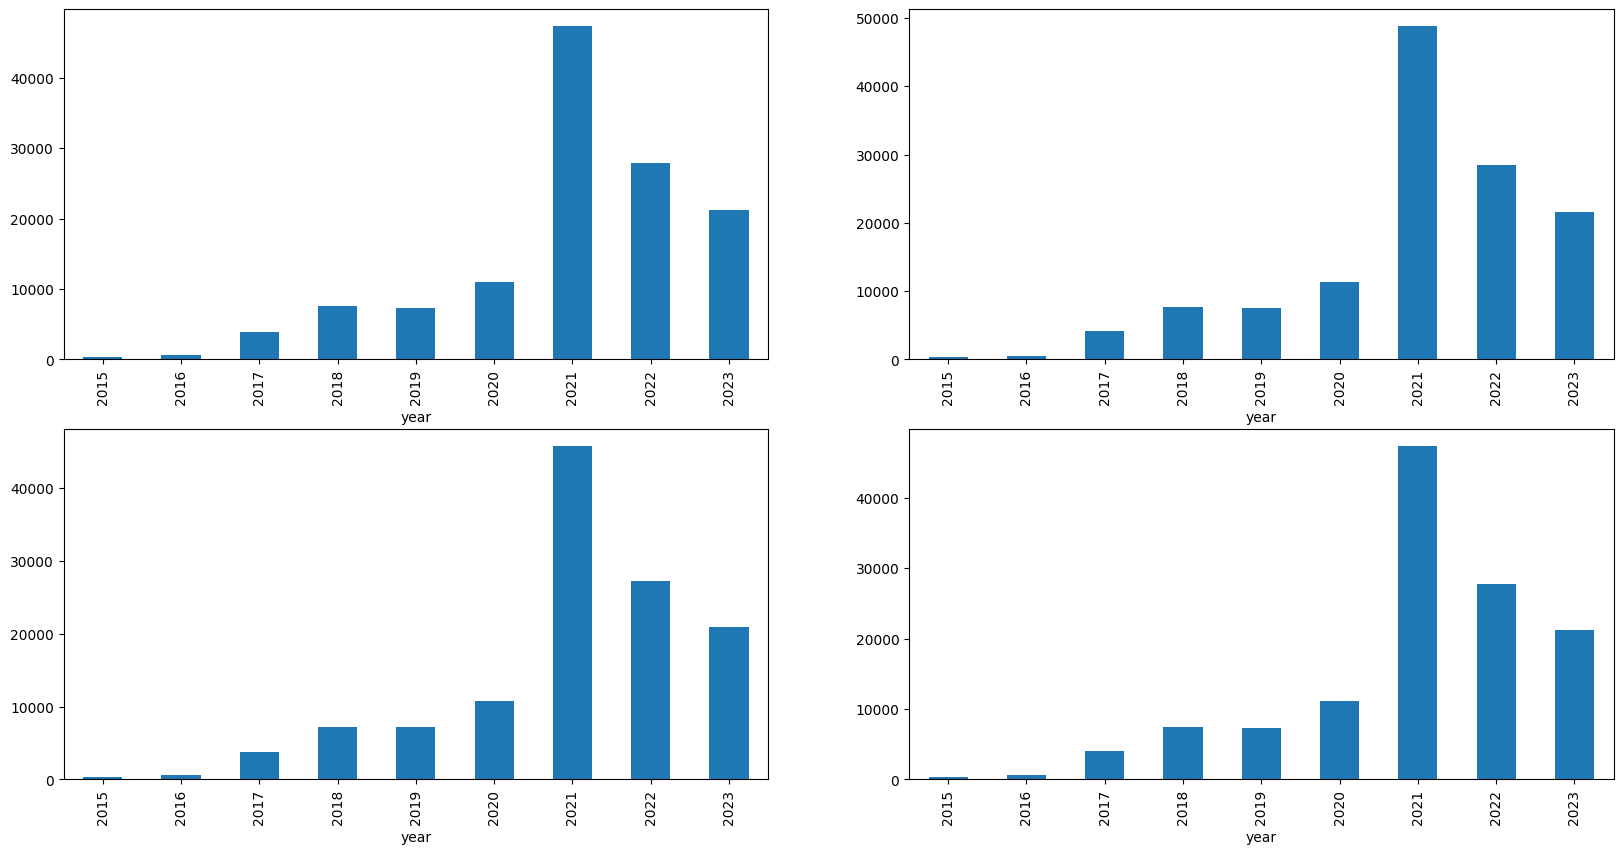

In [13]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

C:\Users\memed\AppData\Local\Temp\ipykernel_12004\3355488516.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True, cbar=False)


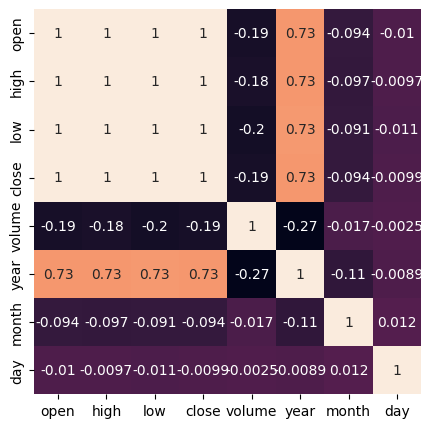

In [23]:
plt.figure(figsize=(5,5))
sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()